In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mpld3

import rain

In [2]:
mpld3.disable_notebook()
#mpld3.enable_notebook()

In [3]:
FREQUENCY = 30

df = pd.read_csv(rain.toRelPath("data/df-cache.csv"))
df = df.iloc[::(1000 * FREQUENCY // 500), :]
df.reset_index(inplace = True)

mid = df["mid"]
mid.fillna(method = "bfill", inplace = True)
print(mid)

0        7436.995
1        7436.955
2        7437.310
3        7437.300
4        7437.325
5        7437.140
6        7437.120
7        7437.835
8        7437.820
9        7439.310
10       7443.415
11       7441.035
12       7442.725
13       7447.880
14       7445.075
15       7443.140
16       7443.185
17       7444.005
18       7445.315
19       7441.395
20       7443.365
21       7442.540
22       7441.375
23       7438.675
24       7440.630
25       7440.085
26       7439.675
27       7441.625
28       7439.165
29       7439.310
           ...   
12210    7404.710
12211    7404.555
12212    7400.300
12213    7397.995
12214    7393.380
12215    7391.425
12216    7386.350
12217    7382.365
12218    7380.200
12219    7380.185
12220    7380.075
12221    7370.375
12222    7358.105
12223    7354.275
12224    7356.445
12225    7355.425
12226    7356.610
12227    7368.360
12228    7370.640
12229    7369.705
12230    7372.905
12231    7373.380
12232    7371.935
12233    7377.570
12234    7

Power portfolio adjusts: 1.8717850625426669


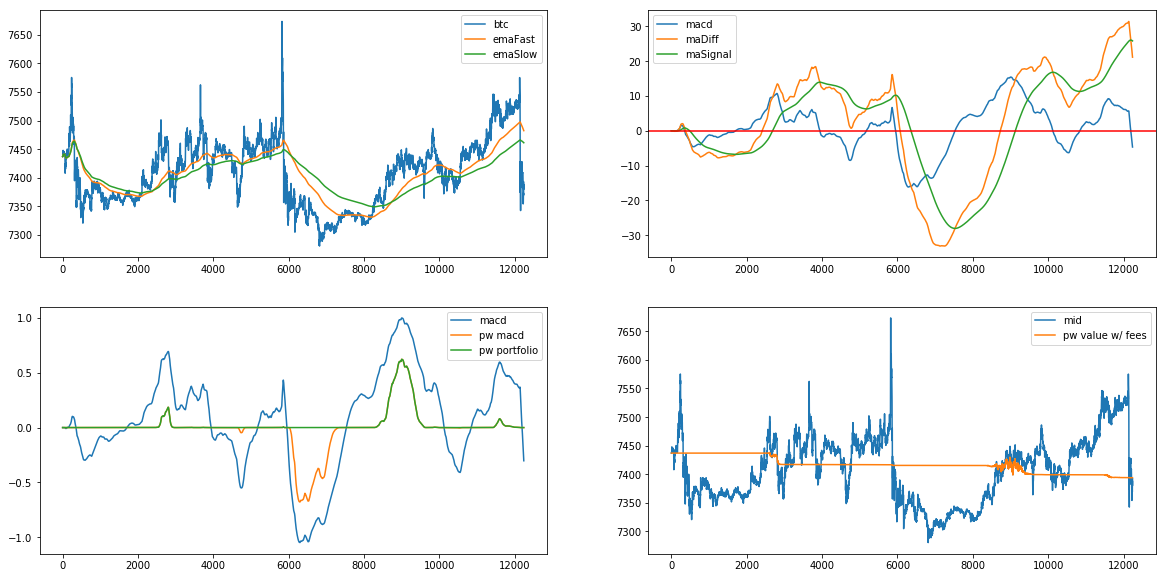

In [15]:
MACD_LEN_RATIO = [12, 26, 9]
MACD_LEN_MULTIPLIER = 3000
FEE_RATIO = 25 * 1e-4

macdLens = [a * MACD_LEN_MULTIPLIER // FREQUENCY for a in MACD_LEN_RATIO]
macd, maDiff, maSignal, emaFast, emaSlow = rain.computeMACD(mid, macdLens[0], macdLens[1], macdLens[2])

pwMACD = np.power(np.tanh(macd / mid[0] * 1000), 15)
pwPort = pwMACD.copy()
pwPort[pwPort < 0] = 0

dPWPort = pwPort.shift(-1) - pwPort
print("Power portfolio adjusts:", np.sum(dPWPort.abs()))

plt.figure(figsize = (20, 10))
plt.subplot(2, 2, 1)
plt.plot(mid, label = "btc")
plt.plot(emaFast, label = "emaFast")
plt.plot(emaSlow, label = "emaSlow")
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(macd, label = "macd")
plt.plot(maDiff, label = "maDiff")
plt.plot(maSignal, label = "maSignal")
plt.axhline(y = 0, color = "r")
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(macd / macd[macd.idxmax()], label = "macd")
plt.plot(pwMACD, label = "pw macd")
plt.plot(pwPort, label = "pw portfolio")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(mid, label = "mid")
plt.plot(rain.portfolioToValue(pwPort, mid, FEE_RATIO), label = "pw value w/ fees")
plt.legend()
plt.show()